In [ ]:
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Saving kaggle.json to kaggle.json
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 12.8MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# First analysis for data integrity
- Check data quantity (Shape)
- Check the type of each feature
- Check of null values

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()
# OR
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Plot of Features
- Check balance of each class
- Better understanding of the data

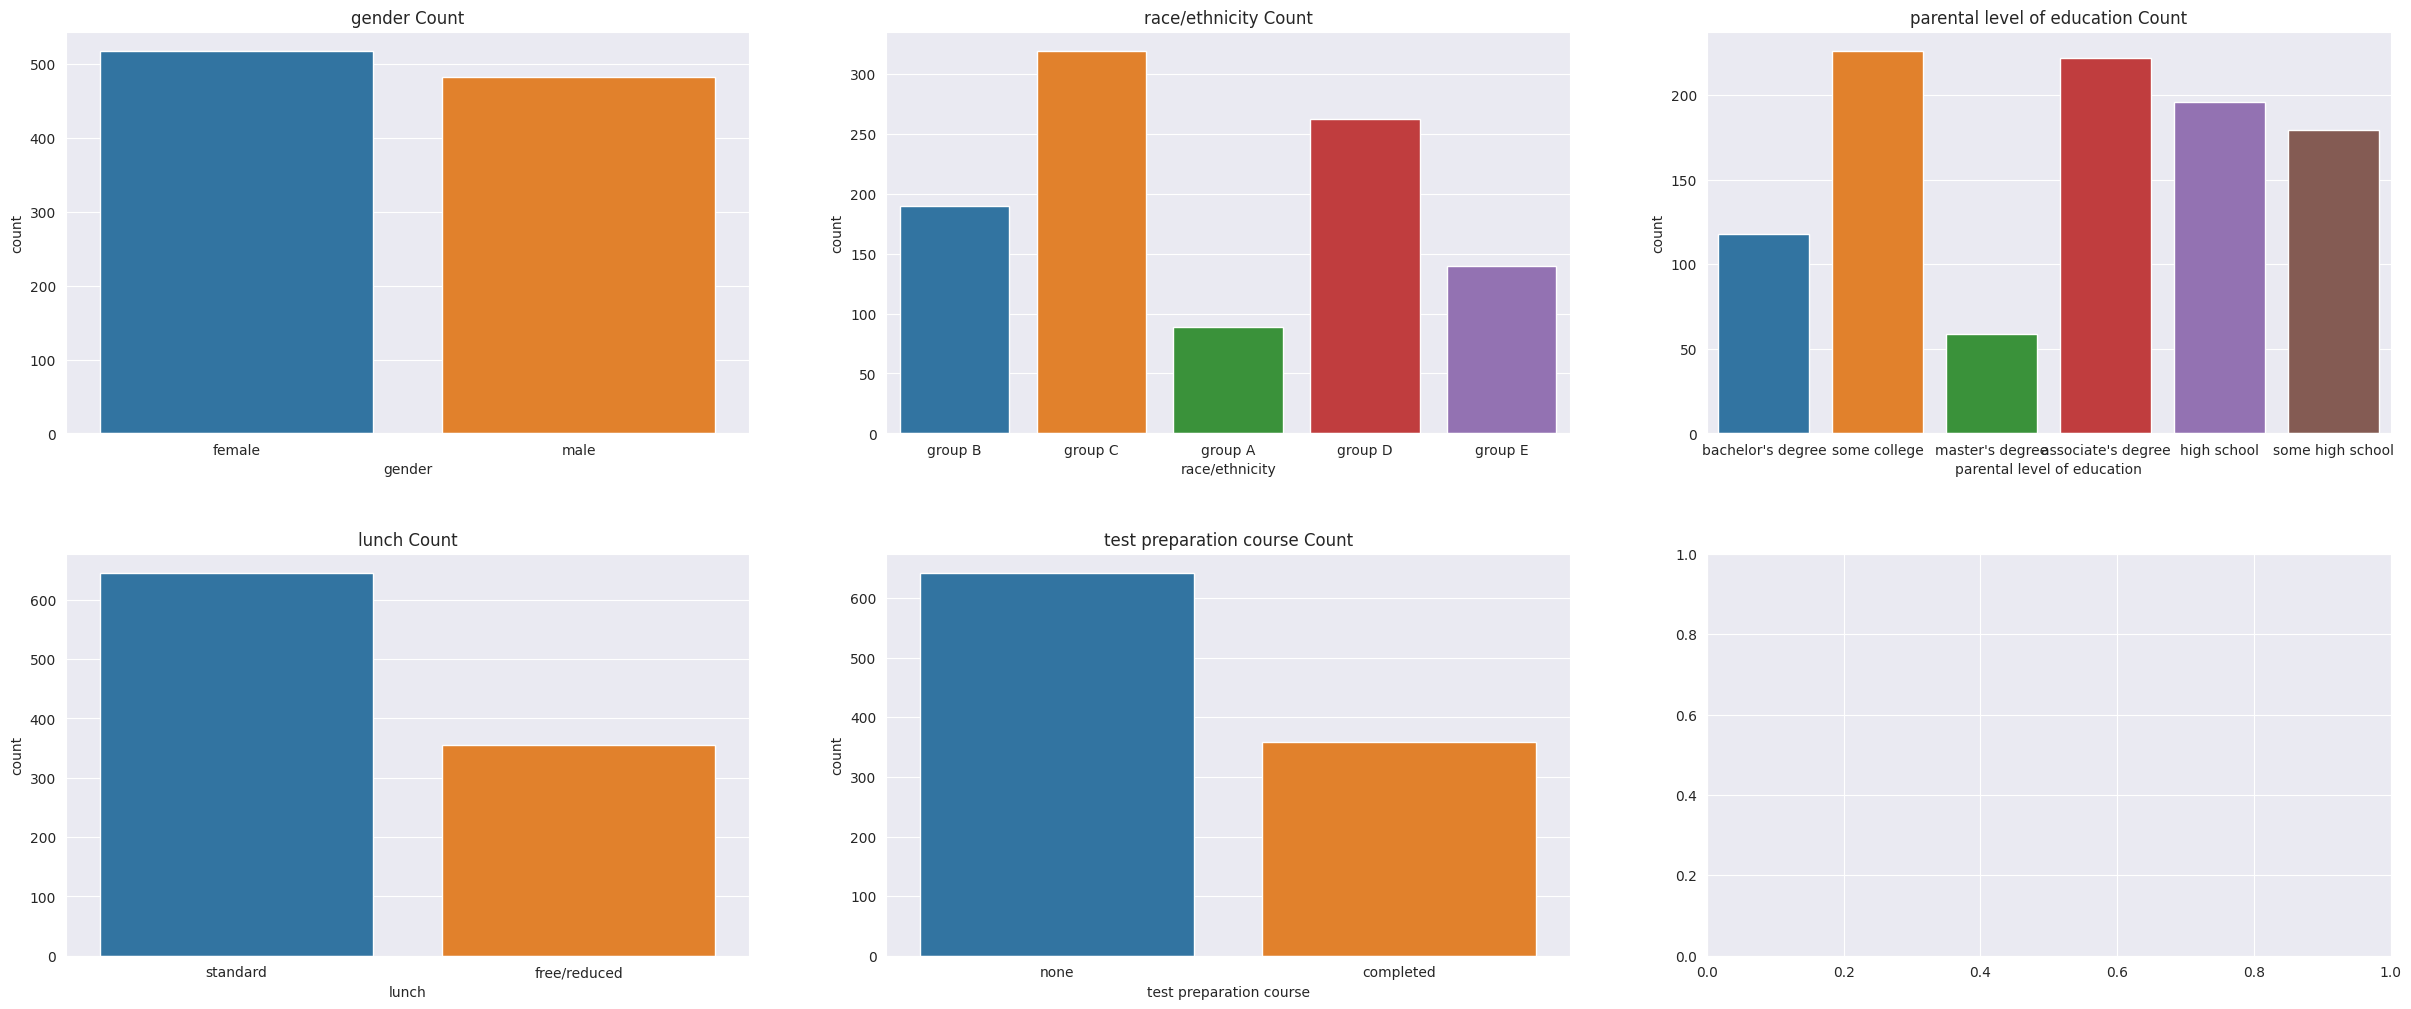

In [ ]:
classes = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 12))
plt.subplots_adjust(hspace=0.3)

# loop through tickers and axes
for i, ax in zip(classes, axs.ravel()):
    sns.countplot(df, x=i,hue=i, ax=ax)
    ax.set_title('{} Count'.format(i))
plt.show()

# Distributions of exams results and Relationship between them

<Axes: >

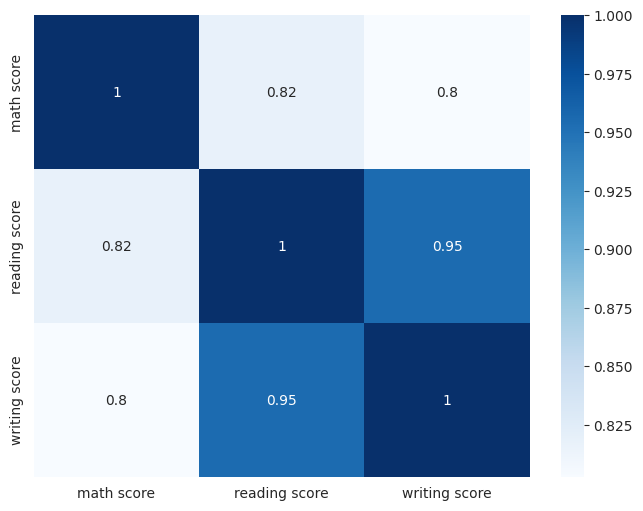

In [ ]:
Exam_results = df.iloc[:,-3:]

plt.figure(figsize=(8,6))
sns.heatmap(data=Exam_results.corr(),annot=True, cmap=plt.cm.Blues) #plt.cm.PuBuGn

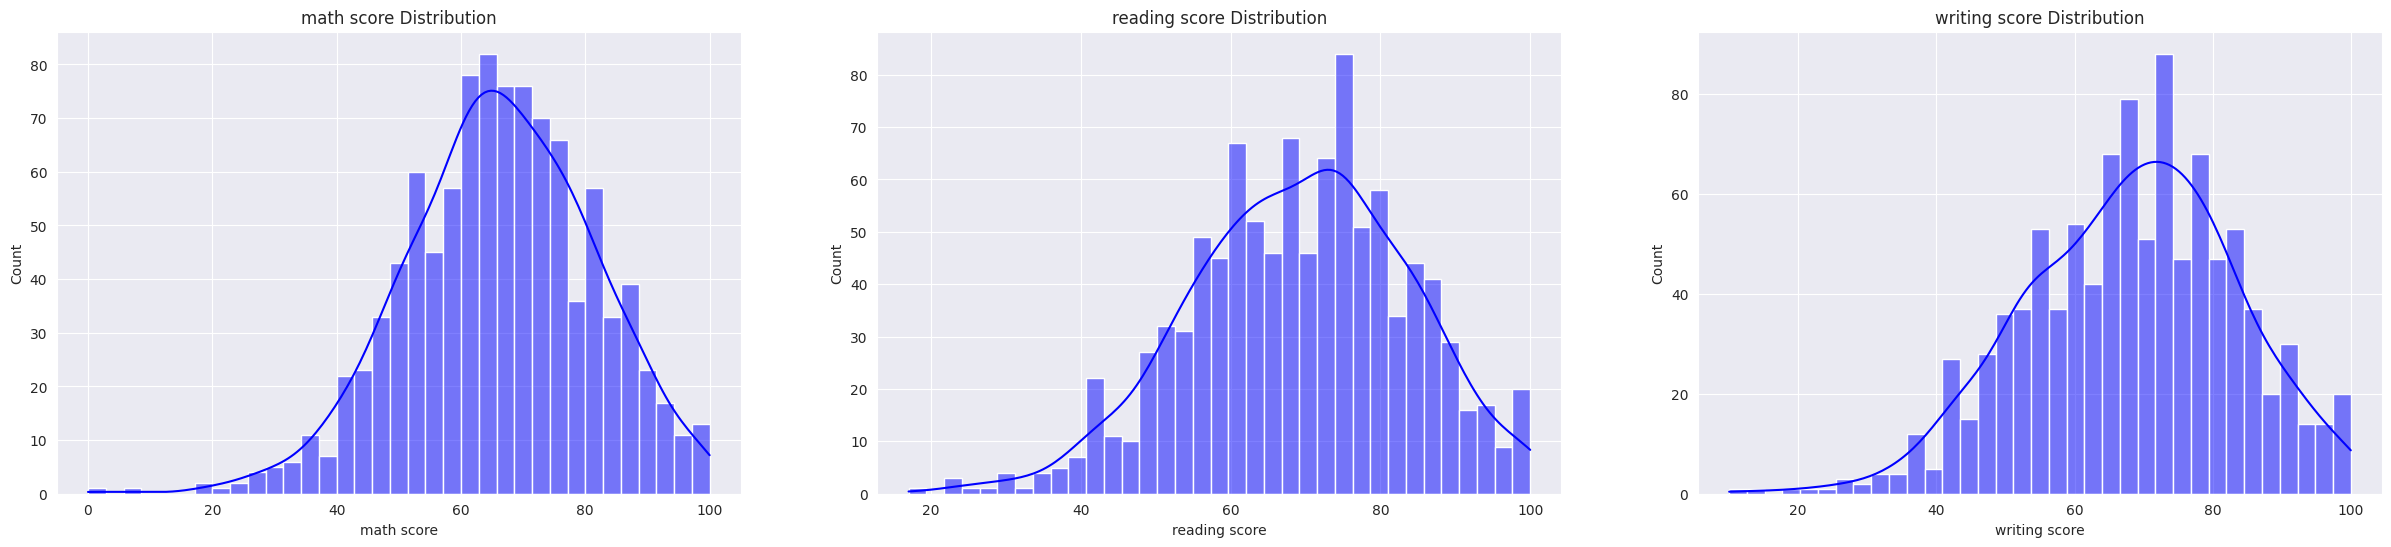

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
plt.subplots_adjust(hspace=0.2)

# loop through tickers and axes
for i, ax in zip(Exam_results.columns, axs.ravel()):
    sns.histplot(data = Exam_results, x=i,kde=True, bins=35, color='blue', ax=ax)
    ax.set_title('{} Distribution'.format(i))
    #ax.set_xlabel(rotation=45, horizontalalignment = 'right', fontweight = 'light',fontsize='x-large')
plt.show()

#### Conclusions:
- All the exam notes distribution aproximates to a normal one
- High correlation betwwen Reading and writing Scores
- Significant correlation between math and the rest of results

# Boxplot of each feature and the exam results:
- Check for correlation between classes and results on each class
- Check for difference between the results of each class on each feature

### Math Score

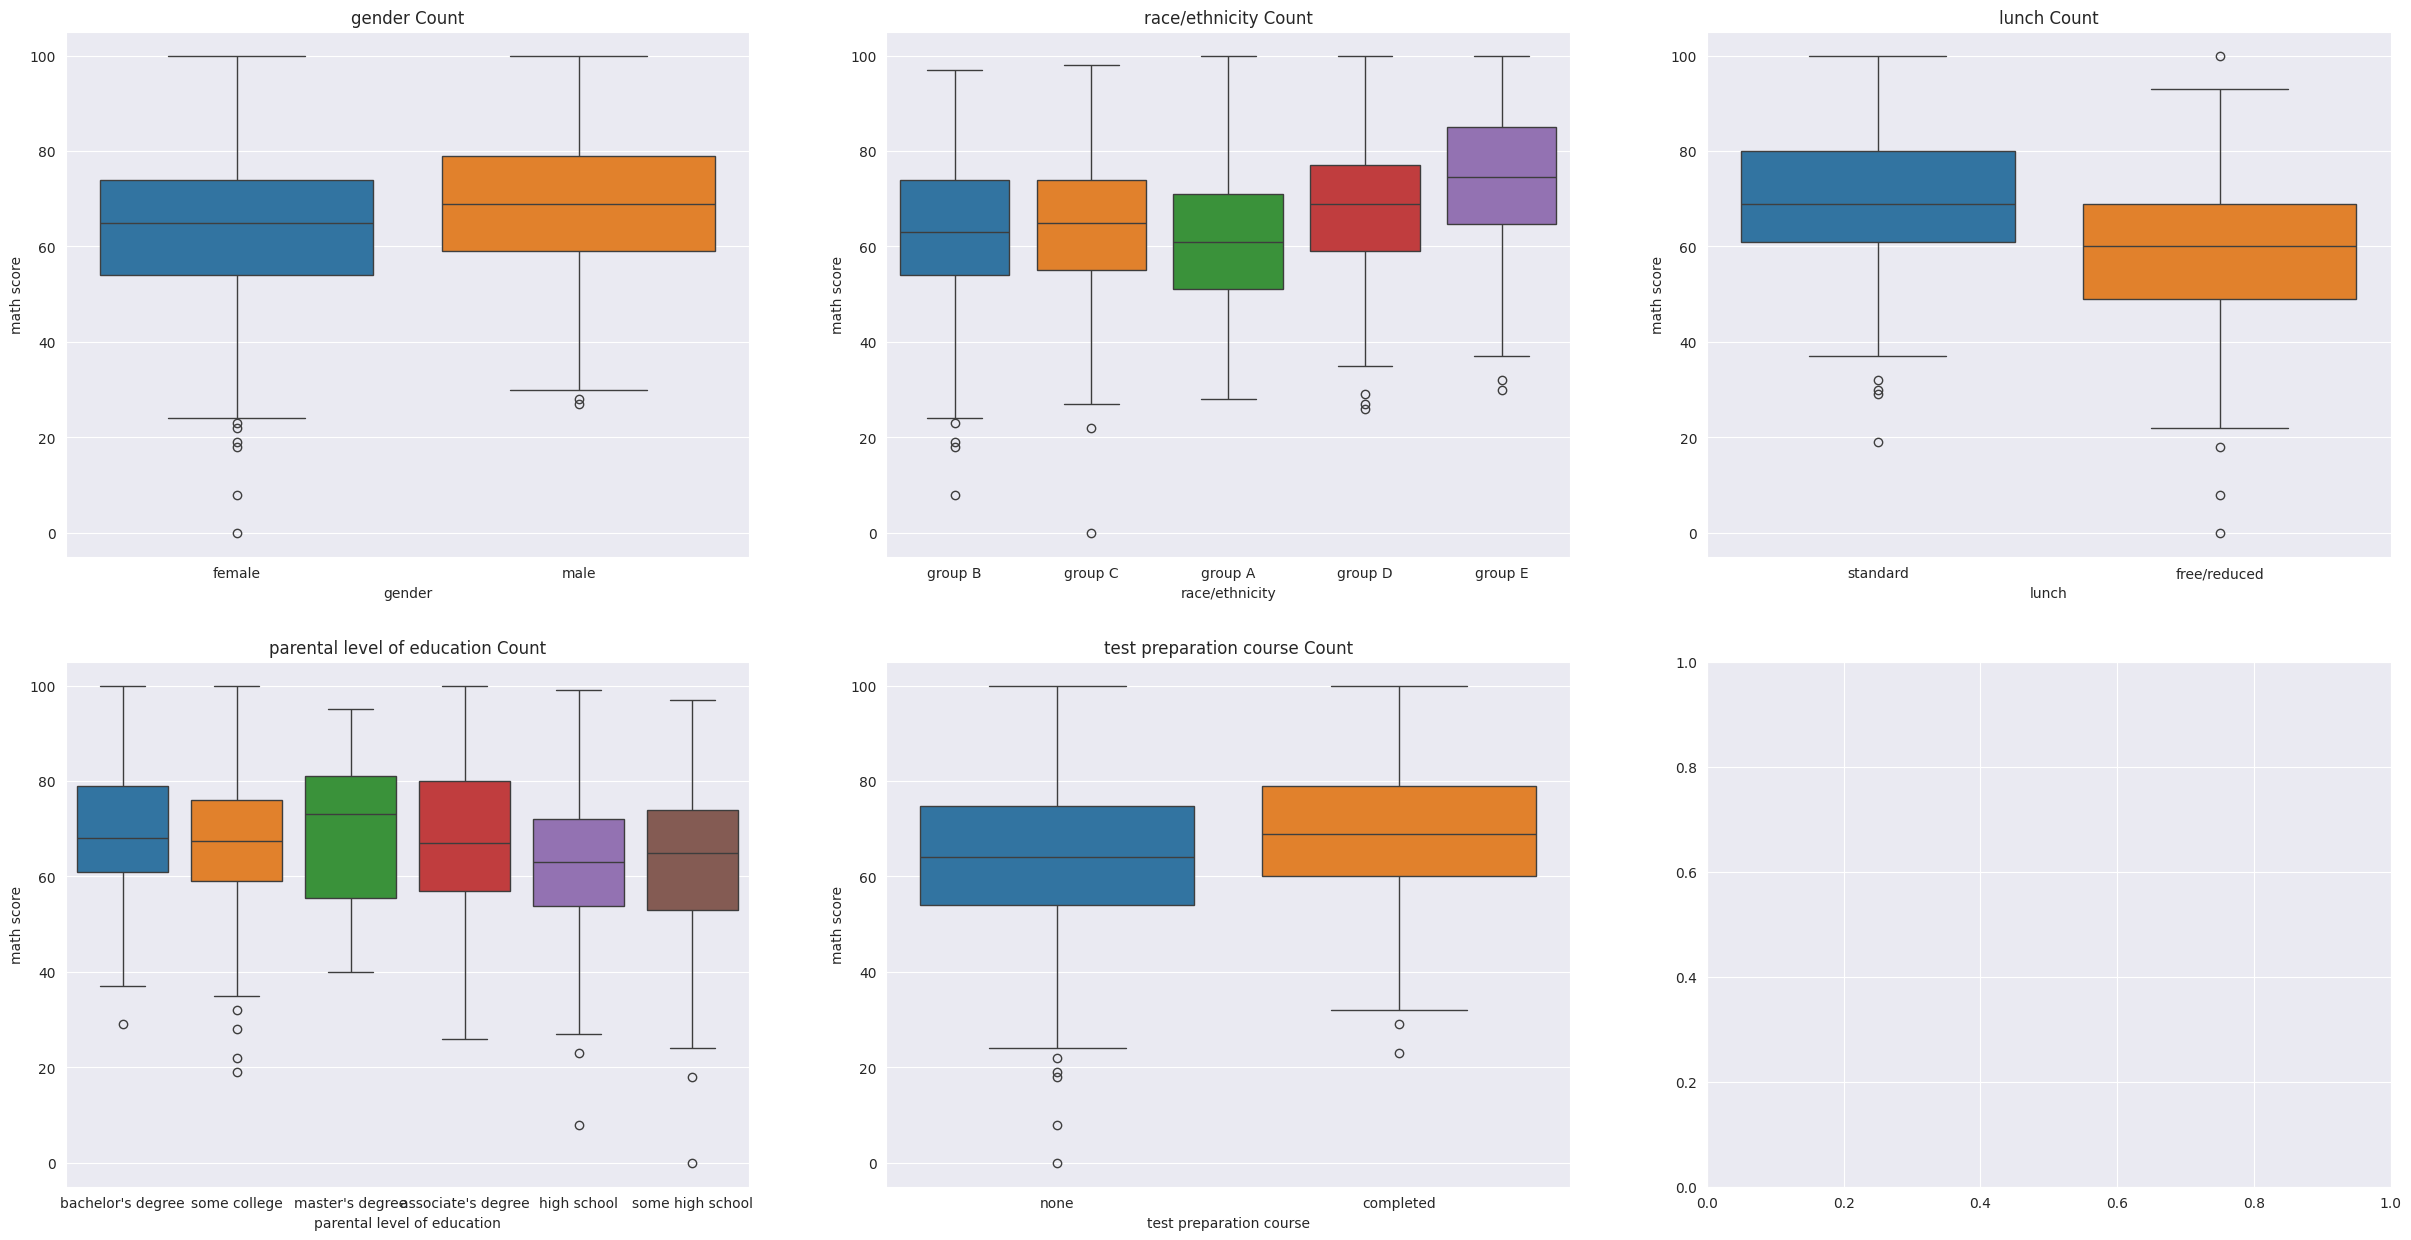

In [ ]:
classes = ['gender','race/ethnicity','lunch','parental level of education','test preparation course']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
plt.subplots_adjust(hspace=0.2)

# loop through tickers and axes
for i, ax in zip(classes, axs.ravel()):
    sns.boxplot(df, x=i,y ="math score",hue=i, ax=ax)
    ax.set_title('{} Count'.format(i))
    #ax.set_xlabel(rotation=45, horizontalalignment = 'right', fontweight = 'light',fontsize='x-large')
plt.show()

#### Conclusions:
- Males get better results (small tendency)
- Ethnicity group E get better results (Pronounced tendency)
- Students with a Standart lunch get better results (Pronounced tendency)
- Students with parents with masters degree get better results (small tendency)
- Students that make test preparation NOT nesscesary get better results

### Reading Score

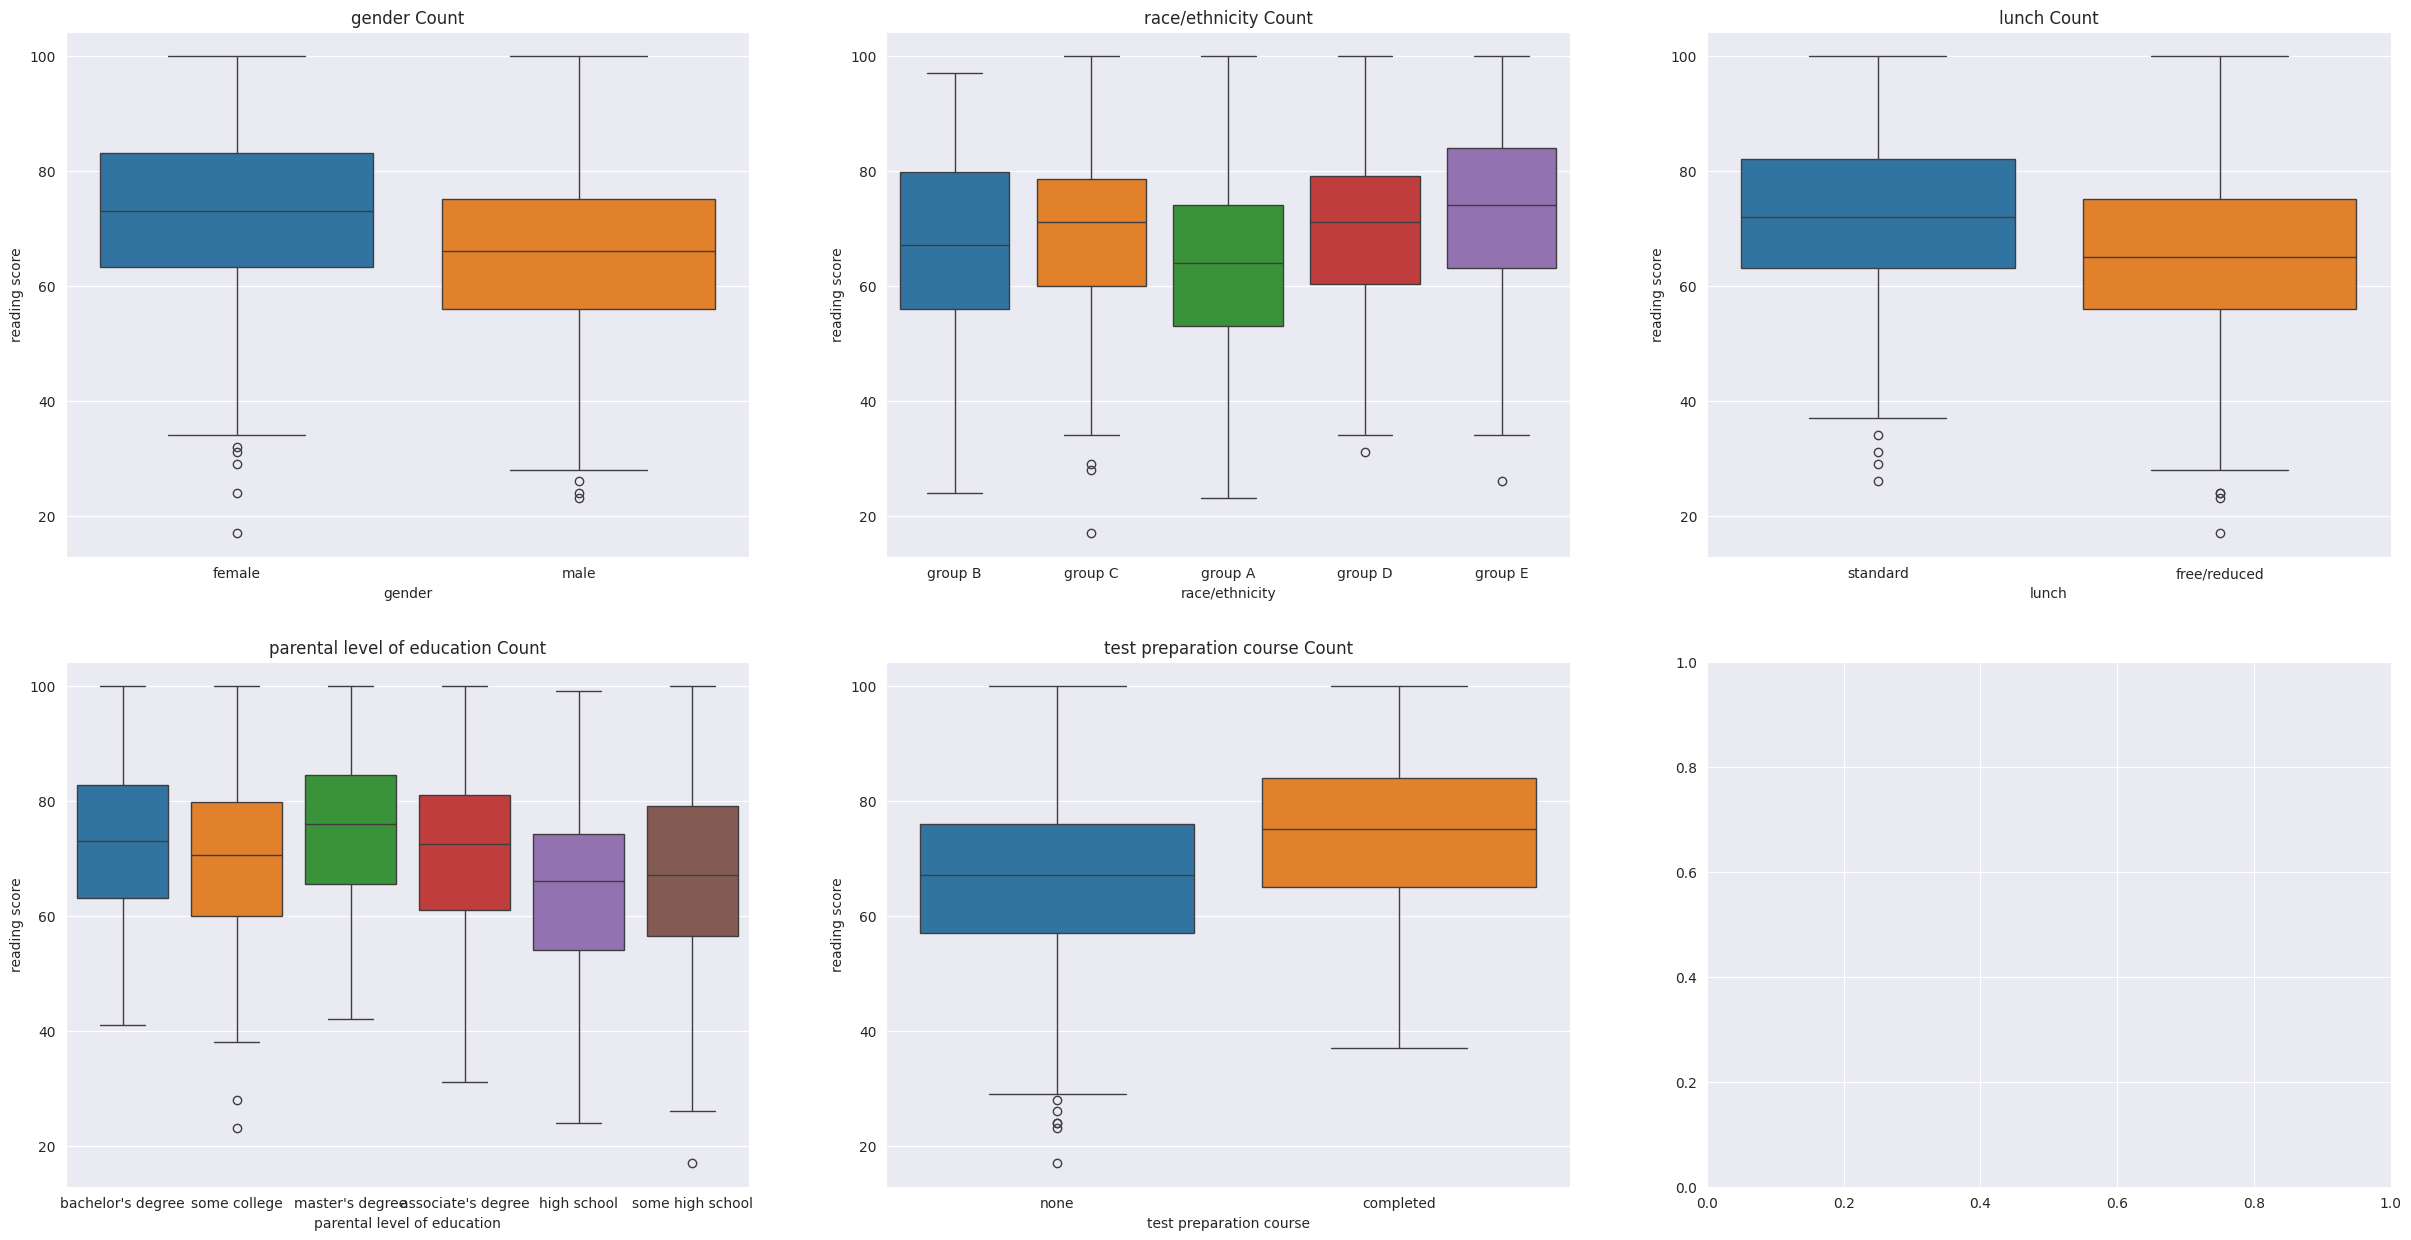

In [ ]:
classes = ['gender','race/ethnicity','lunch','parental level of education','test preparation course']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
plt.subplots_adjust(hspace=0.2)

# loop through tickers and axes
for i, ax in zip(classes, axs.ravel()):
    sns.boxplot(df, x=i,y ="reading score",hue=i, ax=ax)
    ax.set_title('{} Count'.format(i))
    #ax.set_xlabel(rotation=45, horizontalalignment = 'right', fontweight = 'light',fontsize='x-large')
plt.show()

#### Conclusions:
- Females tend to have better results (Small tendency)
- No significance difference between the ethnicity groups
- Students with Standart lunch get better results (Medium tendency)
- Students with parents with masters degree get better results (small tendency)- Students that make test preparation get better results (Medium tendency)

### Writing Score

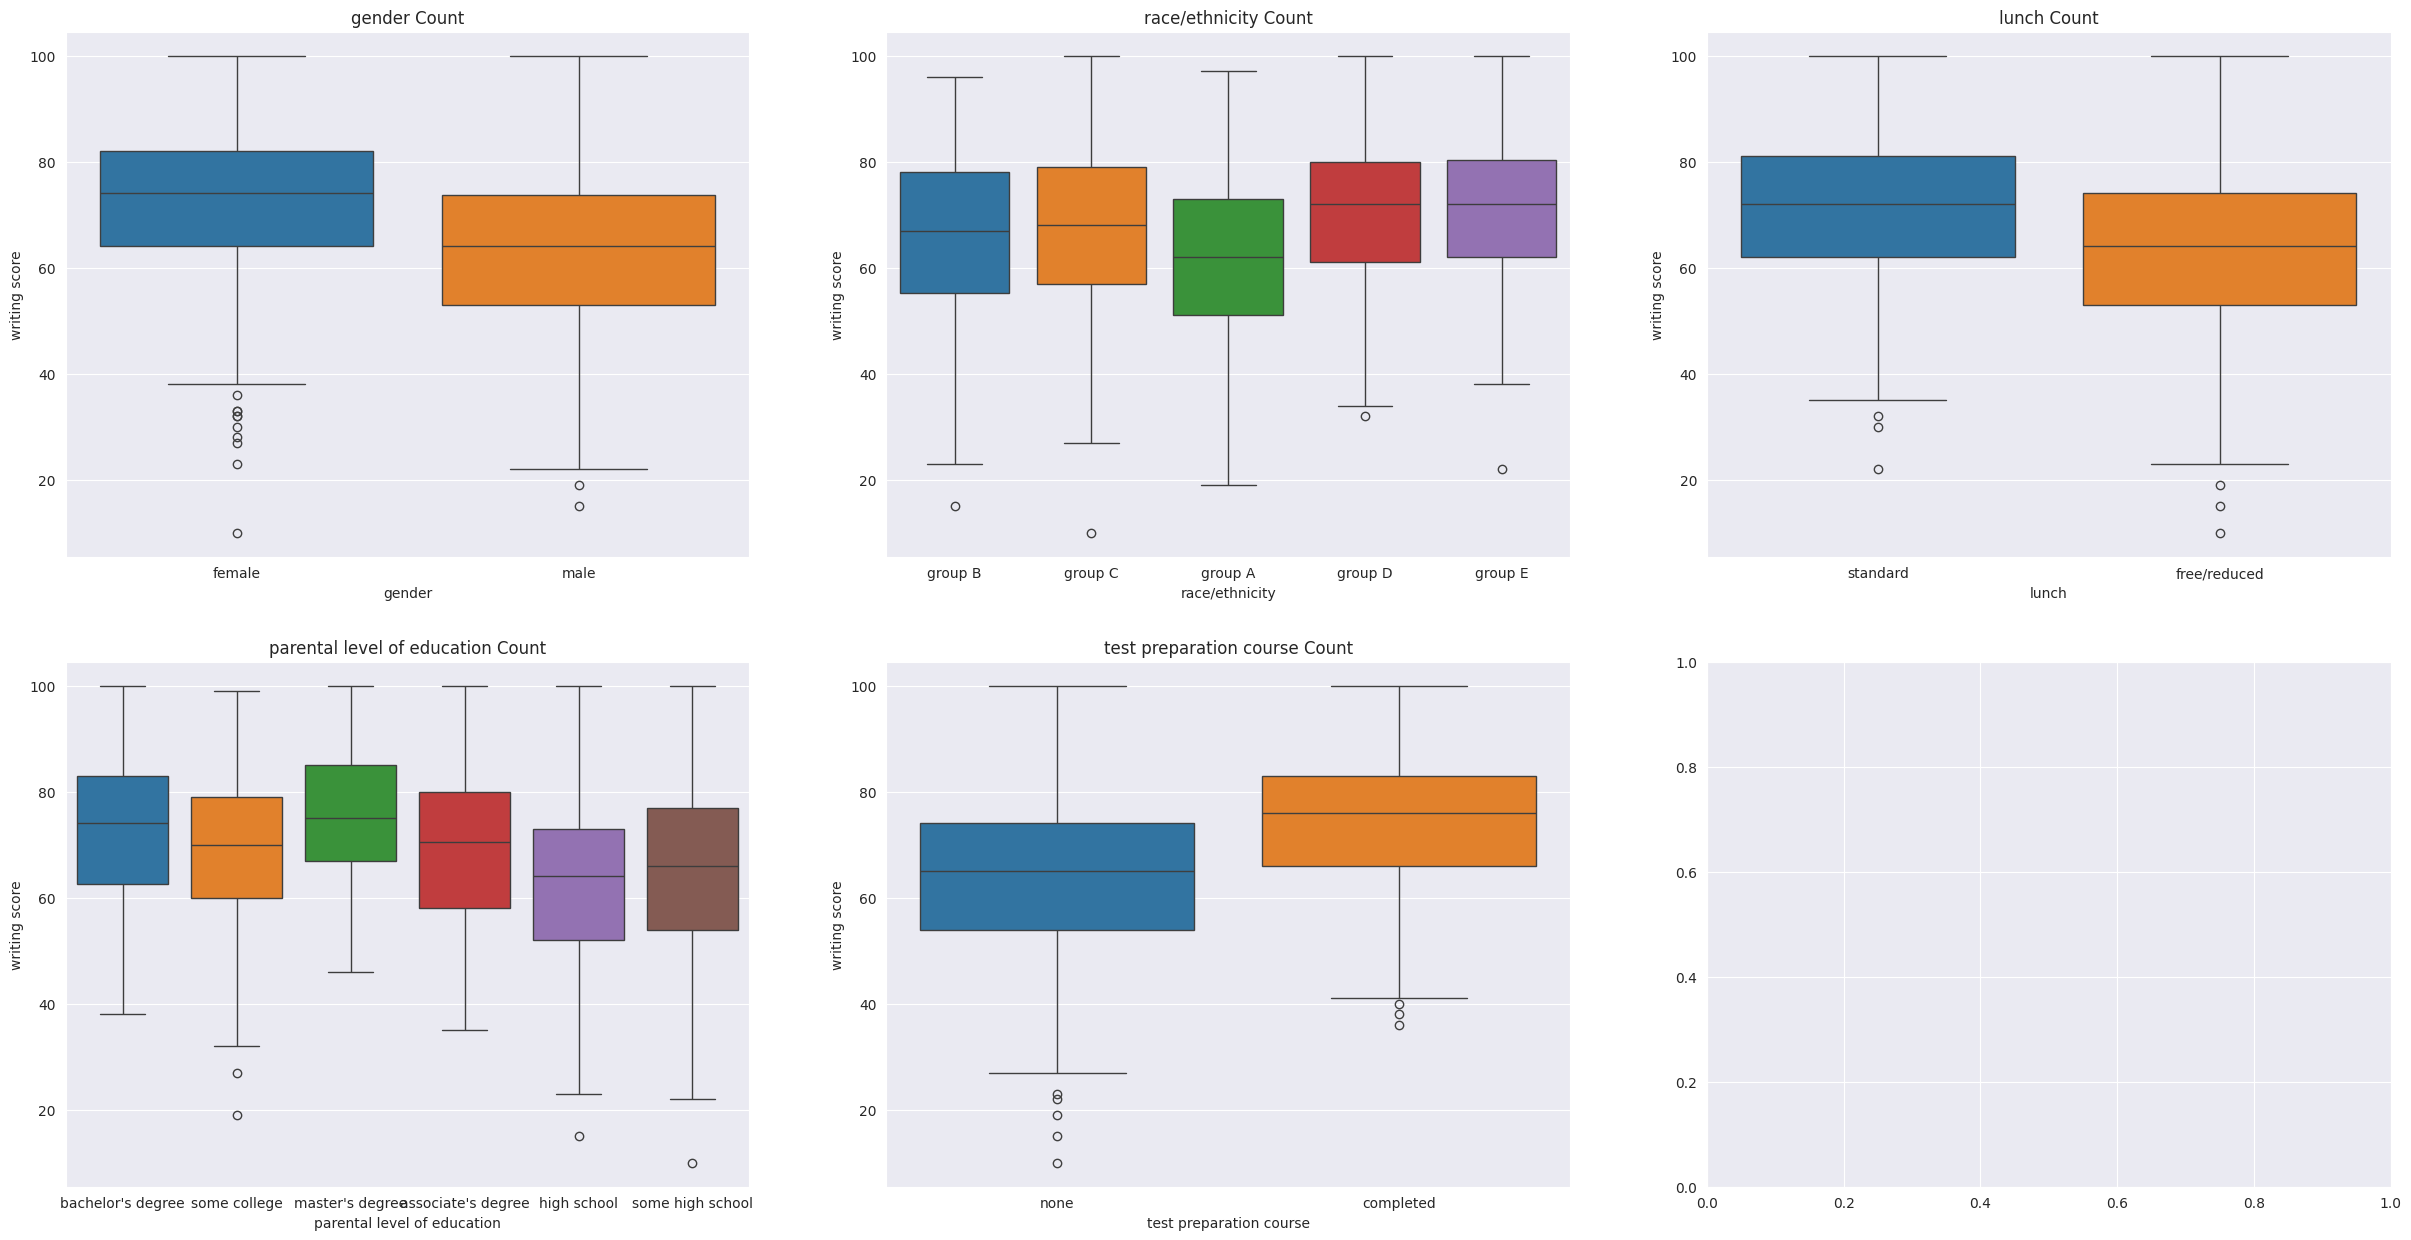

In [ ]:
classes = ['gender','race/ethnicity','lunch','parental level of education','test preparation course']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
plt.subplots_adjust(hspace=0.2)

# loop through tickers and axes
for i, ax in zip(classes, axs.ravel()):
    sns.boxplot(df, x=i,y ="writing score",hue=i, ax=ax)
    ax.set_title('{} Count'.format(i))
    #ax.set_xlabel(rotation=45, horizontalalignment = 'right', fontweight = 'light',fontsize='x-large')
plt.show()

#### Conclusions:
- Females tend to have better results (medium tendency)
- Group A get worst results (Small tendency)
- Students with Standart lunch get better results (medium tendency)
- Students with parents with masters, associate or bachelor degree get better results (small tendency)
- Students that make test preparation get better results (medium tendency)